In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


sns.set(style="whitegrid")


In [2]:

df = pd.read_csv('../../doc1/Data/raw_analyst_ratings/raw_analyst_ratings.csv')

df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


True

In [4]:

analyzer = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['headline'].apply(lambda x: analyzer.polarity_scores(x))

In [5]:

df['compound'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])
df['pos'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['pos'])
df['neu'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['neu'])
df['neg'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['neg'])

In [12]:
df[['headline', 'compound', 'pos', 'neu', 'neg']].head()

,headline,compound,pos,neu,neg
0,Stocks That Hit 52-Week Highs On Friday,0.000,0.000,1.000,0.0
1,Stocks That Hit 52-Week Highs On Wednesday,0.000,0.000,1.000,0.0
2,71 Biggest Movers From Friday,0.000,0.000,1.000,0.0
3,46 Stocks Moving In Friday's Mid-Day Session,0.000,0.000,1.000,0.0
4,B of A Securities Maintains Neutral on Agilent...,0.296,0.145,0.855,0.0


Visualize the sentiment score

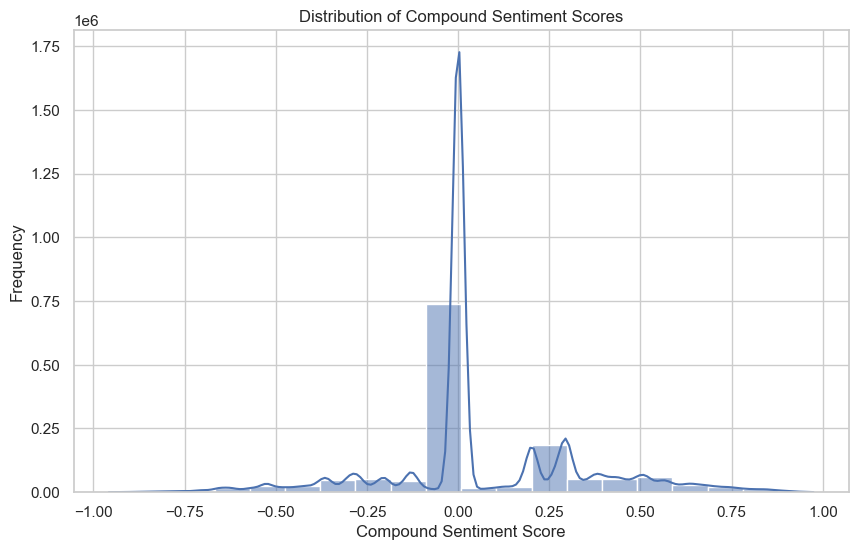

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['compound'], bins=20, kde=True)
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()